<font size="5"> PROYECTO SERIES DE TIEMPO</font>

El proyecto sera segmentado en 3 partes

1 EDA o Analisis exploratorio de datos

2 Optimizacion de las features y variables

3 Implementacion de distintos modelos con optimizacion de hiperparametros

Importamos las librerias iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Cargamos los datasets y les damos un vistazo

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94



Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**
​


In [5]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [6]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [7]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [8]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


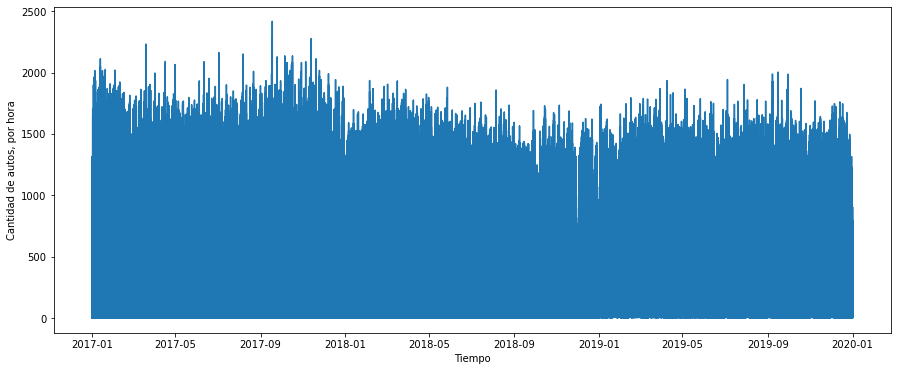

In [9]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [10]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


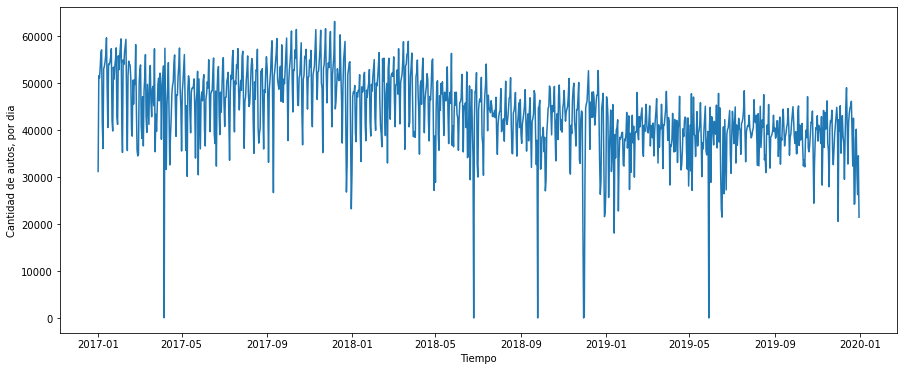

In [11]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Busquemos responder preguntas sobre nuestro dataset

Primero vamos hacer enconding de algunas variables para poder hacer un count de cada una de ellas y podes explicarlas

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [13]:
dataset_encoding=dataset.filter(["dia","sentido","tipo_vehiculo"])
dataset_encoding=dataset.apply(LabelEncoder().fit_transform)


dataset = dataset.drop(["dia","sentido","tipo_vehiculo"],1)

In [14]:
dataset_encoding.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,0,1,1,0,0
1,0,1,0,8,0
2,0,1,0,643,0
3,0,1,1,5,0
4,0,1,1,0,0


In [15]:
#dropeamos variables que no vamos a necesitar con encoding
dataset1 = dataset_encoding.drop(["cantidad_pasos","fecha"],1)
dataset1.reset_index(inplace = True)
dataset1.head()

,index,dia,sentido,tipo_vehiculo
0,0,0,1,1
1,1,0,1,0
2,2,0,1,0
3,3,0,1,1
4,4,0,1,1


In [16]:
#unimos todas las variables
dataset = dataset.join(dataset1)

<AxesSubplot:xlabel='count', ylabel='dia'>

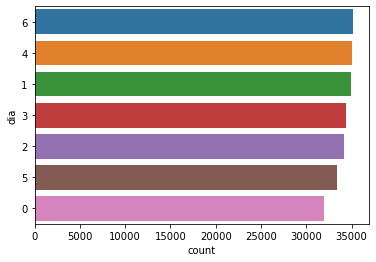

In [17]:
descending_order = dataset['dia'].value_counts().sort_values(ascending=False).index
sns.countplot(data = dataset, y = "dia",order = descending_order)

Que dias son los mas concurridos en esta estacion? Podemos ver que los domingos son los dias de mayor flujo

<AxesSubplot:xlabel='count', ylabel='tipo_vehiculo'>

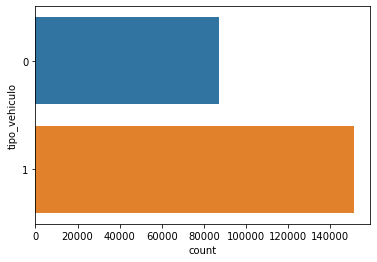

In [18]:
sns.countplot(data = dataset, y = "tipo_vehiculo")

Podemos ver que hay mayor cantidad de flujos de vehiculos livianos

<AxesSubplot:xlabel='count', ylabel='sentido'>

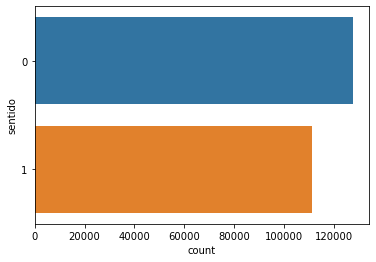

In [19]:
sns.countplot(data = dataset, y = "sentido")

Otra consulta o query que podemos hacernos es cual es el sentido de los vehiculos, si es capital o provincia.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'NO COBRADO'),
  Text(1, 0, 'TELEPASE'),
  Text(2, 0, 'EFECTIVO'),
  Text(3, 0, 'EXENTO'),
  Text(4, 0, 'INFRACCION'),
  Text(5, 0, 'T. DISCAPACIDAD')])

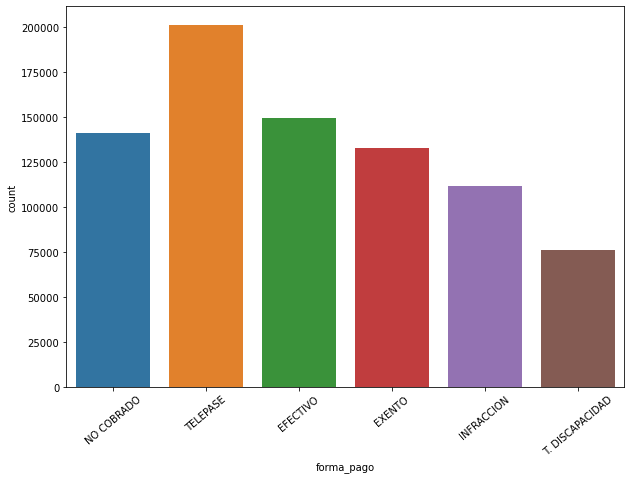

In [20]:
plt.figure(figsize = (10,7))
sns.countplot(data = data_2019, x = "forma_pago")
plt.xticks(rotation=40)

La forma de pago TELEPASE es la mas habitual en los conductores en 2019, esto se debe a que se hablo de que otros medios de pago iban a desaparecer para agilizar el flujo de autos

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'NO COBRADO'),
  Text(1, 0, 'TELEPASE'),
  Text(2, 0, 'EFECTIVO'),
  Text(3, 0, 'EXENTO'),
  Text(4, 0, 'TARJETA DISCAPACIDAD'),
  Text(5, 0, 'INFRACCION')])

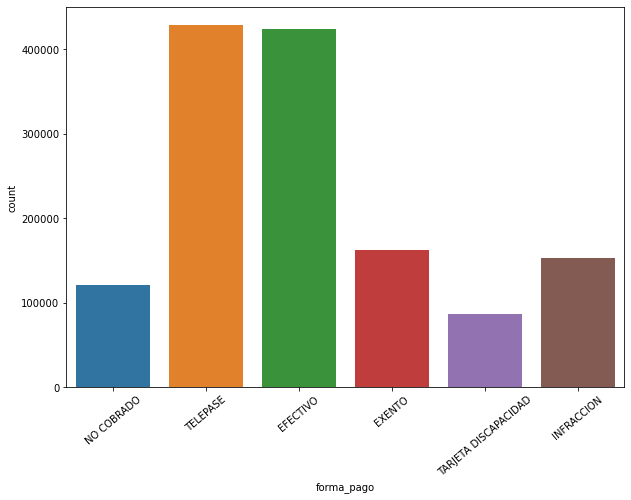

In [21]:
plt.figure(figsize = (10,7))
sns.countplot(data = data_2018, x = "forma_pago")
plt.xticks(rotation=40)

Vemos que forma de pago es la mas habitual en los conductores en 2018, telepase y efectivo son las formas de medio de pago.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'NO COBRADO'),
  Text(1, 0, 'TELEPASE'),
  Text(2, 0, 'EFECTIVO'),
  Text(3, 0, 'TARJETA DISCAPACIDAD'),
  Text(4, 0, 'EXENTO'),
  Text(5, 0, 'INFRACCION'),
  Text(6, 0, 'MONEDERO'),
  Text(7, 0, 'Otros')])

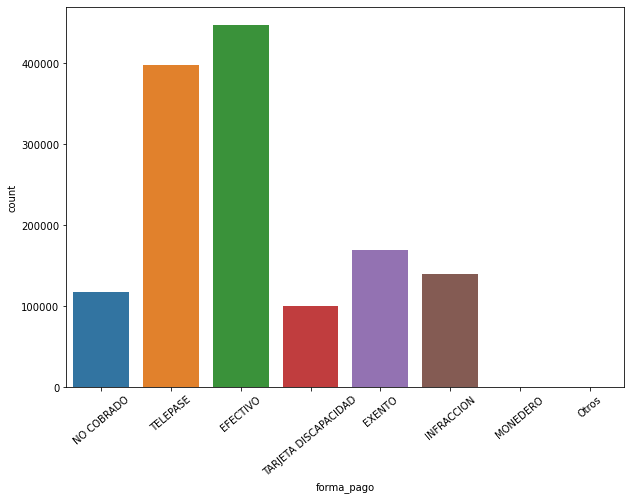

In [22]:
plt.figure(figsize = (10,7))
sns.countplot(data = data_2017, x = "forma_pago")
plt.xticks(rotation=40)

En 2017 la conducta de pago es parecida a la de 2018

<font size="5"> Ingenieria de Features</font>

Imputacion de valores faltantes

In [23]:
dataset.isnull ().sum()

cantidad_pasos    0
fecha             0
index             0
dia               0
sentido           0
tipo_vehiculo     0
dtype: int64

In [24]:
#Explorar valores faltantes 2019
data_2019.isna().sum()
#Explorar valores faltantes 2018
data_2018.isna().sum()
#Explorar valores faltantes 2017
data_2017.isna().sum()

periodo           0
fecha             0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
dtype: int64

Conclusion: no hay valores faltantes en nuestro set de datos

In [25]:
diario_1 = diario.copy()
diario_1.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


Entendemos desvio estandar nuestra mediana y promedio

In [26]:
diario_atipico = diario[diario.cantidad_pasos <= 10000]
diario_atipico

,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


- Conclusion: Se observan valores atipicos (En el grafico podemos visualizarlos como picos negativos)
La hipotesis que tenemos de estos valores atípicos se deben a fechas donde hubo fallas con el pago en efectivo.

* Se toma la decision de reemplazar eso valores atípicos mediante la interpolacion.
 * La interpolación es el proceso de encontrar un valor entre dos puntos en una línea o una curva. Para ayudarnos a recordar lo que significa, debemos pensar en la primera parte de la palabra, 'inter', como si significara 'ingresar', lo que nos recuerda que debemos mirar 'dentro' de los datos que teníamos originalmente. Esta herramienta, la interpolación, no solo es útil en estadísticas, sino que también es útil en ciencia, negocios o cuando existe la necesidad de predecir valores que se encuentran dentro de dos puntos de datos existentes.

In [27]:
diario.cantidad_pasos[diario.cantidad_pasos <=10000] = np.nan

In [28]:
print(diario.isna().sum())
diario = diario.interpolate(method='nearest', k = 4)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


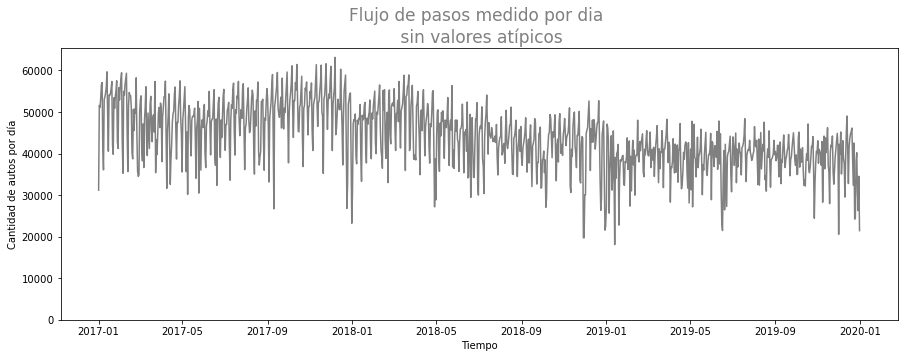

In [29]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, color = 'grey')
plt.title("Flujo de pasos medido por dia \n sin valores atípicos", color= 'grey', fontsize= 17)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por día')
plt.ylim(ymin=0)
plt.show()

En el grafico vemos que no tenemos mas valores atipicos, ya con la tecnica de interpolacion aplicada

<font size="5"> Implementacion de Modelos</font>

Empezamos a probar los primeros modelos

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import scipy as sp

In [31]:
#Creamos una copia de nuestro dataframe
data_ml = dataset.copy()
data_ml

,cantidad_pasos,fecha,index,dia,sentido,tipo_vehiculo
0,1,2017-01-01 00:00:00,0,0,1,1
1,9,2017-01-01 00:00:00,1,0,1,0
2,644,2017-01-01 00:00:00,2,0,1,0
3,6,2017-01-01 00:00:00,3,0,1,1
4,1,2017-01-01 00:00:00,4,0,1,1
...,...,...,...,...,...,...
238864,556,2019-12-31 22:00:00,238864,3,1,0
238865,1,2019-12-31 22:00:00,238865,3,1,1
238866,580,2019-12-31 22:00:00,238866,3,0,0
238867,214,2019-12-31 23:00:00,238867,3,0,0


In [32]:
dataset_encoding.drop(columns = ['cantidad_pasos'], inplace = True)

In [33]:
X = dataset_encoding
y = data_ml['cantidad_pasos']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)



In [34]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs = 4).fit(X_train,y_train)
linear_model = LinearRegression()

In [35]:
random_grid = {'bootstrap': [False],
               'max_depth': [10, 20, 30, 40, 50],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [50, 70, 100]}

In [36]:
RFReg = RandomizedSearchCV(rf, random_grid,n_iter=10, random_state=0, cv=5)



In [37]:
linear_model.fit(X_train, y_train)
RFReg.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=50, n_jobs=4,
                                                   random_state=42),
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 70, 100]},
                   random_state=0)

Modelo: Regresión lineal benchmark
Raíz del error cuadrático medio en Train: 314.43388079668887
Raíz del error cuadrático medio en Test: 312.67050786477


C:\Users\Marcos\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


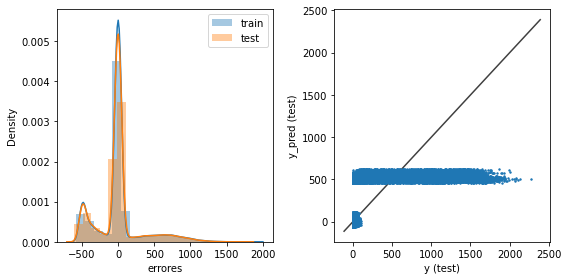

In [38]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal benchmark']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Lo que estamos viendo es que el modelo no logra interpretar el factor de la estacionalidad, con lo cual da un error cuadratico medio bastante elevado

Modelo: Random Forrest Regressor
Raíz del error cuadrático medio en Train: 301.66485911618815
Raíz del error cuadrático medio en Test: 304.9927204863953


C:\Users\Marcos\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


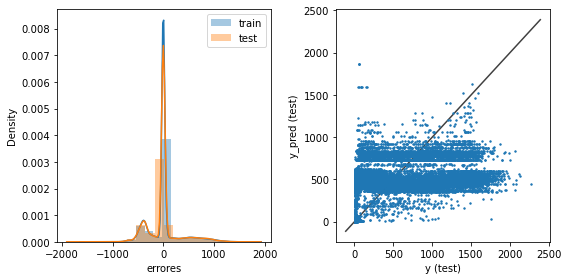

In [39]:
from sklearn.metrics import mean_squared_error
modelos = ['Random Forrest Regressor']

for i, model in enumerate([RFReg]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Aca vemos lo mismo que en el regresor lineal, el modelo no es acertivo, aunque mejora en el rmse, tambien se debe a la falta del factor de estacionalidad.


In [40]:
print("Mejores parametros: "+str(RFReg.best_params_))
print("Mejor Score: "+str(RFReg.best_score_)+'\n')

scores = pd.DataFrame(RFReg.cv_results_)
scores

Mejores parametros: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}
Mejor Score: 0.4276931302601696



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.517162,0.608904,0.223339,0.001362,70,2,2,auto,20,False,"{'n_estimators': 70, 'min_samples_split': 2, '...",0.366666,0.372889,0.376082,0.366803,0.382397,0.372967,0.005939,3
1,4.776389,0.192085,0.335510,0.001204,50,2,1,sqrt,30,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.115805,0.126783,0.118486,0.122838,0.151097,0.127002,0.012616,9
2,3.902512,0.107021,0.222938,0.000751,50,2,4,sqrt,30,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.385889,0.391599,0.371865,0.389804,0.387893,0.385410,0.007035,2
3,5.080408,0.301590,0.403536,0.054233,50,2,1,sqrt,40,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",-0.014562,-0.000398,-0.010167,0.003147,0.015619,-0.001272,0.010596,10
4,6.031771,0.120149,0.447282,0.001330,70,2,2,sqrt,50,False,"{'n_estimators': 70, 'min_samples_split': 2, '...",0.196272,0.208031,0.186235,0.204377,0.204090,0.199801,0.007792,8
5,4.404172,0.086914,0.335511,0.001750,50,2,2,sqrt,40,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.217551,0.224480,0.206463,0.224580,0.233588,0.221332,0.009012,6
6,4.100567,0.114383,0.313035,0.045161,50,2,2,sqrt,30,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.276805,0.279317,0.273817,0.281728,0.290710,0.280476,0.005753,5
7,5.162881,0.094083,0.223540,0.001172,50,2,4,auto,40,False,"{'n_estimators': 50, 'min_samples_split': 2, '...",0.368998,0.384537,0.362667,0.372417,0.365969,0.370918,0.007536,4
8,6.158777,0.167450,0.517112,0.094541,70,5,2,sqrt,50,False,"{'n_estimators': 70, 'min_samples_split': 5, '...",0.215797,0.224782,0.205677,0.221353,0.218898,0.217302,0.006516,7
9,2.391714,0.072726,0.112372,0.000001,50,10,2,auto,10,False,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.420374,0.432860,0.426460,0.426240,0.432532,0.427693,0.004633,1


In [41]:
print(RFReg.best_estimator_.feature_importances_)

[0.00844626 0.00177798 0.87384731 0.11592845]


In [42]:
from sklearn.inspection import permutation_importance
importancia = permutation_importance(
                estimator    = RFReg,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train.columns
df_importancia.sort_values('importances_mean', ascending=True)

,importances_mean,importances_std,feature
1,0.948675,0.146127,sentido
0,5.071814,0.167975,dia
3,24.413892,0.212355,fecha
2,168.221486,0.509617,tipo_vehiculo


Vemos que tipo_vehiculo y sentido son las variables mas importantes de nuestro modelo

Que otras preguntas podemos abordar con nuestro conjunto de datos?bien vamos a explorar mas en profundidad

In [43]:
from fbprophet import Prophet

In [44]:
dataset.head()

,cantidad_pasos,fecha,index,dia,sentido,tipo_vehiculo
0,1,2017-01-01,0,0,1,1
1,9,2017-01-01,1,0,1,0
2,644,2017-01-01,2,0,1,0
3,6,2017-01-01,3,0,1,1
4,1,2017-01-01,4,0,1,1


In [45]:
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0


In [46]:
diario.reset_index(inplace=True,drop=False)
diario

,fecha,cantidad_pasos
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
1090,2019-12-27,40182.0
1091,2019-12-28,30681.0
1092,2019-12-29,26259.0
1093,2019-12-30,34523.0


In [47]:
ds = diario.fecha
y = diario.cantidad_pasos
dataset2 = pd.concat([ds,y],axis=1)

In [48]:
dataset2.rename(columns={'fecha': 'ds', 'cantidad_pasos': 'y'}, inplace=True)

In [49]:
dataset2.head()

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0


In [50]:
m = Prophet(weekly_seasonality=True,
            daily_seasonality=True)
m.fit(dataset2)

In [51]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
1180,2020-03-26
1181,2020-03-27
1182,2020-03-28
1183,2020-03-29
1184,2020-03-30


In [52]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1180,2020-03-26,40073.640291,34002.022262,46539.047345
1181,2020-03-27,42010.545998,35632.294941,47698.553090
1182,2020-03-28,34284.360409,28048.447622,40239.840265
1183,2020-03-29,29613.683353,23465.838957,35786.110971
1184,2020-03-30,35492.473415,29347.981608,41693.048298


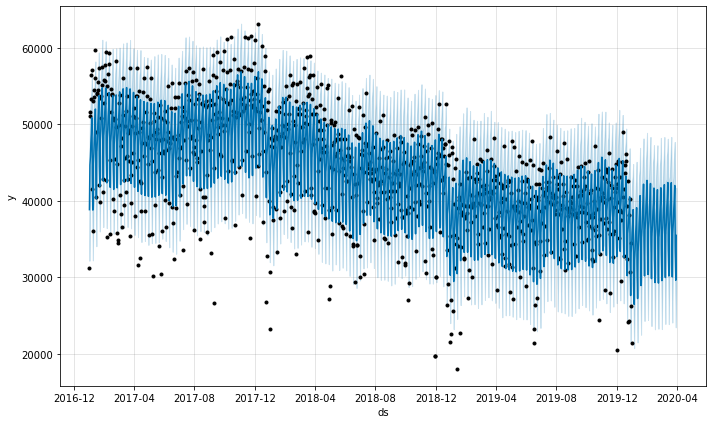

In [53]:
fig1 = m.plot(forecast)


Vemos el factor de estacionalidad que toma este modelo, lo cual hace que tenga una mejor prediccion que los modelos benchmark.

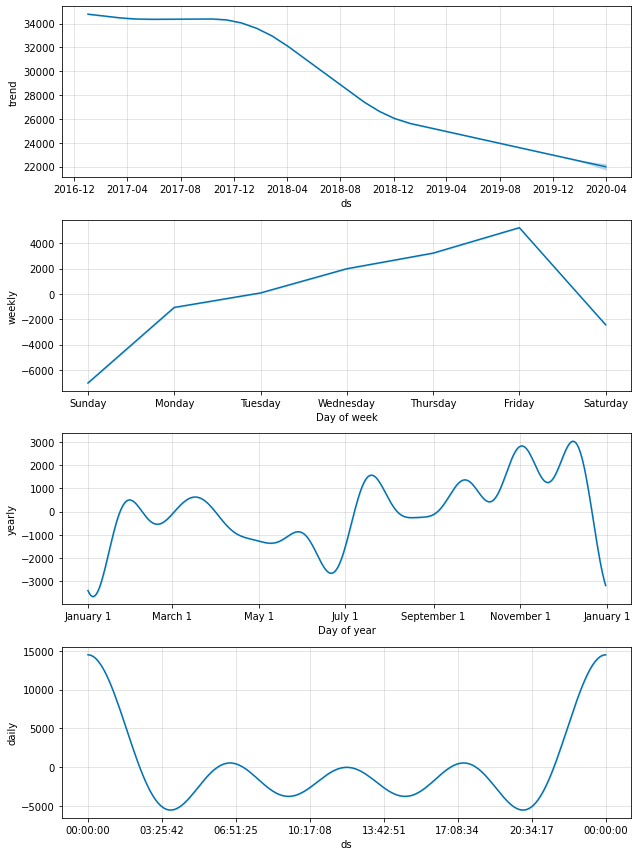

In [54]:
fig2 = m.plot_components(forecast)

In [55]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,34786.920702,32169.497540,44715.614921,34786.920702,34786.920702,4059.820401,4059.820401,4059.820401,14480.710055,...,-7022.059474,-7022.059474,-7022.059474,-3398.830180,-3398.830180,-3398.830180,0.0,0.0,0.0,38846.741103
1,2017-01-02,34782.611189,38728.934897,50749.907165,34782.611189,34782.611189,9890.869873,9890.869873,9890.869873,14480.710055,...,-1063.413385,-1063.413385,-1063.413385,-3526.426797,-3526.426797,-3526.426797,0.0,0.0,0.0,44673.481062
2,2017-01-03,34778.301676,39461.815404,52066.163116,34778.301676,34778.301676,10949.016145,10949.016145,10949.016145,14480.710055,...,80.221656,80.221656,80.221656,-3611.915566,-3611.915566,-3611.915566,0.0,0.0,0.0,45727.317821
3,2017-01-04,34773.992163,41357.300540,53530.908053,34773.992163,34773.992163,12813.878457,12813.878457,12813.878457,14480.710055,...,1988.298592,1988.298592,1988.298592,-3655.130189,-3655.130189,-3655.130189,0.0,0.0,0.0,47587.870621
4,2017-01-05,34769.682651,42413.083495,54405.235076,34769.682651,34769.682651,14043.910035,14043.910035,14043.910035,14480.710055,...,3219.834713,3219.834713,3219.834713,-3656.634733,-3656.634733,-3656.634733,0.0,0.0,0.0,48813.592685


In [56]:
split_date_2 = '2018-09-12'
dataset2 = dataset2.loc[dataset2.ds <= split_date_2].copy()
dataset2

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
615,2018-09-08,42370.0
616,2018-09-09,35522.0
617,2018-09-10,41239.0
618,2018-09-11,43451.0


In [57]:
y_pred = forecast[['ds', 'yhat']].loc[forecast.ds < split_date_2]
y_pred

,ds,yhat
0,2017-01-01,38846.741103
1,2017-01-02,44673.481062
2,2017-01-03,45727.317821
3,2017-01-04,47587.870621
4,2017-01-05,48813.592685
...,...,...
614,2018-09-07,47773.887014
615,2018-09-08,40173.515254
616,2018-09-09,35638.529753
617,2018-09-10,41661.196877


In [58]:
y_true = dataset2[['ds', 'y']].loc[dataset2.ds < split_date_2]
y_true

,ds,y
0,2017-01-01,31183.0
1,2017-01-02,51568.0
2,2017-01-03,51093.0
3,2017-01-04,53332.0
4,2017-01-05,56486.0
...,...,...
614,2018-09-07,48600.0
615,2018-09-08,42370.0
616,2018-09-09,35522.0
617,2018-09-10,41239.0


In [59]:
from sklearn.metrics import mean_absolute_error
y_true = y_true['y']
y_pred = y_pred['yhat']
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 3238.094


In [60]:
print('Raiz del error cuadratico medio: ')
np.sqrt(mae)

Raiz del error cuadratico medio: 


56.904251705235545

Vemos que con prophet mejora considerablemente , disminuye el error en test, podemos concluir que para este problema , es mejor abordarlo con prophet a partir de una serie de tiempo porque se le hace otro tratamiento a los valores atipicos con interpolacion, y porque entiende de la estacionalidad como el factor importante para predecir, y previsibilizar un forecast del trafico mas acertivo.

Que otras preguntas podriamos abordar con este conjunto de datos? Podriamos analizar los horarios para viajar y en que horarios serian los mas adecuados para evitar trafico a partir de un modelo y poder predecir la demanda en tal horario de la proxima semana, para ofrecer alternativas o incentivar el telepase

Como objetivo principal de este proyecto quiero poder predecir el flujo de automoviles para poder reducir el trafico, brindar esta informacion a los conductores con el fin de disminuir la demanda de vehiculos en el mismo horario y estacion.
